In this assignment, we will look at some cross-linguistic word form data and use some of the tools we saw in class to build family trees of languages based on the sound forms of words---otherwise known as "optimal phylogenies." 

We will use data from the following recent paper.


[Dellert, Johannes, Daneyko, T., Muench, A., Ladygina, A., Buch, A., Clarius, N., Grigorjew, I., Balabel, M., Boga, H. I., Baysarova, Z., Muehlenbernd, R., Wahle, J., and Jaeger, G. (2020). Northeuralex: A wide-coverage lexical database of northern eurasia. Language Resources & Evaluation, 54(273–301).](https://drive.google.com/file/d/1ptoMNctdJs99wPWfBUGbw4_X60NtKl9B/view?usp=sharing)

This data  can be found [here](http://northeuralex.org/) as well.

Copy the data to your drive folder from: [here](https://drive.google.com/file/d/1Mfa8XayBFJb0fY8wfinODw90yuRal8AD/view?usp=sharing), [here](https://drive.google.com/file/d/1AQqkscWKlq3quw-BWjB8xqSQzm7-uDtt/view?usp=sharing), and [here](https://drive.google.com/file/d/1R7ZLEzDW9QKUen3BjItPsySaUPCpu7xk/view?usp=sharing).

***Question 1:*** What is the Northeuralex dataset? Give a brief overview. What kind of data is it? What is its purpose? How was it constructed? No need to go into all of the particulars (such as fields of the files), just give an overview of no more than one paragraph that gives the gist for someone unfamiliar with the dataset.

**Q1: The Northeuralex dataset is a large-scale lexicostatistical database composed of 1,016 concepts across 107 languages from Northern Eurasia.  The dataset was designed to be used as the basis for creating new benchmarks in computational historical linguistics.  Ultimately, the creators hoped to improve computational moodels of language relationship and language contact.  Lexical data from more than 20 language families is provided by this dataset in a unified IPA coding.  This was generated automatically based on phonological descriptions for the languages or by making use of extended dictionary orthographics.**


Let's read in the wordforms in this dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import pandas as pd

In [3]:
wordforms=pd.read_csv("/content/drive/My Drive/northeuralex.csv")
display(wordforms)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate
1,fin,finn1318,Ohr::N,korva,kɔrʋɑ,k ɔ r ʋ ɑ,korwa,KURWA,KVRWV,validate
2,fin,finn1318,Nase::N,nenä,nɛnæ,n ɛ n æ,nEnE,NENE,NVNV,validate
3,fin,finn1318,Mund::N,suu,suː,s u u,su,SY,SV,validate
4,fin,finn1318,Zahn::N,hammas,hɑmːɑs,h ɑ m m ɑ s,hamas,HAMAS,HVMVS,validate
...,...,...,...,...,...,...,...,...,...,...
121608,cmn,mand1415,verkaufen::V,卖,mâɪ̯,m a ɪ,mai,MAI,MV,validate
121609,cmn,mand1415,bezahlen::V,付钱,fû t͡ɕʰjɛ̌n,f u _ t͡ɕ ʰ j ɛ n,fuCyEn,BY_CJE2N,PV_KJV1N,validate
121610,cmn,mand1415,zahlen::V,支付,t͡ʂɨ˦fû,t ʂ ɨ f u,C3fu,CI1BY,KV1PV,validate
121611,cmn,mand1415,beherrschen::V,统治,tʰʊ̂̌ŋt͡ʂɨ̂,tʰ ʊ ŋ t ʂ ɨ,tuNC3,TY2NCI,TV1NKV,validate


In [4]:
x = wordforms['rawIPA'].unique()
y = wordforms['IPA'].unique()

print(x.shape)
print(y.shape)

(104068,)
(102738,)


***Question 2:*** Describe the meaning of the `Langauge_ID`, `Concept_ID`, `rawIPA` and `IPA` columns of the data.

**Q2:**

**Language_ID is the 3 letter abbreviation for the language.  There are 107 languages.**

**Concept_ID is the concept in German.  There are 1016 concepts.**

**rawIPA is the direct phonetic transcription of a word using the International Phonetic Alphabet.**

**IPA is the phonetic transcription of a word using the International Phonetic Alphabet that has been modified to include spaces around phonemes.  There are less unique IPA strings than rawIPA strings, suggesting that certain 'rawIPA' values have the same 'IPA' string**

Now let's read in some metadata about the languages.

In [5]:
languages=pd.read_csv("/content/drive/My Drive/northeuralex-languages.csv")
display(languages)

,name,glotto_code,iso_code,family,subfamily,latitude,longitude
0,Finnish,finn1318,fin,Uralic,Finnic,61.0000,24.4500
1,North Karelian,kare1335,krl,Uralic,Finnic,65.1691,30.8655
2,Olonets Karelian,livv1243,olo,Uralic,Finnic,61.0000,33.0000
3,Veps,veps1250,vep,Uralic,Finnic,60.3353,34.7865
4,Estonian,esto1258,ekk,Uralic,Finnic,59.2500,24.7500
...,...,...,...,...,...,...,...
102,Dargwa,darg1241,dar,Nakh-Daghestanian,Daghestanian,42.4257,47.4388
103,Chechen,chec1245,che,Nakh-Daghestanian,Nakh,43.5000,45.5000
104,Standard Arabic,stan1318,arb,Afro-Asiatic,Semitic,27.9625,43.8525
105,Modern Hebrew,hebr1245,heb,Afro-Asiatic,Semitic,31.1056,35.0179


In [6]:
x = wordforms['Language_ID'].unique()
y = languages['iso_code'].unique()

for i in range(107):
    if x[i] != y[i]:
        print(x[i], y[i])

chv sah
sah chv
xal bua
bua xal


***Question 3:*** Describe the meaning of the `Family`, `iso_code`, and `subfamily` columns of the data.

**Q3:**

**Family refers to the language family of the word.**

**iso_code is the 3 letter abbreviation for the language and matches the Language_ID from northeuralex.csv.  There are 107 languages.**

**subfamily is the specific branch of the family.**

Now let's read in some further data about the concepts.



In [7]:
concepts=pd.read_csv("/content/drive/My Drive/northeuralex-concepts.csv")
display(concepts)

,number,position_in_ranking,ranking_value,id_nelex,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,1,44,"-2,539237",Auge::N,eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,2,34,"-2,649194",Ohr::N,ear,ухо,[[Anatomie]],[[anatomy]],[[анатомия]],EAR,1247,EAR,NaN
2,3,149,"-1,995463",Nase::N,nose,нос,[[Anatomie]],[[anatomy]],[[анатомия]],NOSE,1221,NOSE,NaN
3,4,25,"-2,762589",Mund::N,mouth,рот,[[Anatomie]],[[anatomy]],[[анатомия]],MOUTH,674,MOUTH,NaN
4,5,31,"-2,670705",Zahn::N,tooth,зуб,[BSP:menschlicher Schneidezahn],[EX:human incisor],[НАПР:человека],TOOTH,1380,TOOTH,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,1012,140,"-2,029052",verkaufen::V,sell,продать,[BSP:Ware],[EX:goods],[НАПР:товар],SELL,1571,SELL,NaN
1012,1013,198,"-1,822012",bezahlen::V,pay for,заплатить,[BSP:Ware],[EX:goods],[НАПР:за товар],NaN,0,PAY_FOR,NaN
1013,1014,235,"-1,715766",zahlen::V,pay,платить,[BSP:im Restaurant],[EX:in a restaurant],[НАПР:в ресторане],PAY,718,PAY,NaN
1014,1015,899,"0,118183",beherrschen::V,rule,владеть,[BSP:Land],[EX:country],[НАПР:страной],RULE,1846,RULE,NaN


In [8]:
x = wordforms['Concept_ID'].unique()
y = concepts['id_nelex'].unique()

print(x.shape)
print(y.shape)

(1016,)
(1016,)


***Question 4:*** Describe the meaning of the `id_nelex`, `gloss_en`, and `position_in_ranking` columns of the data.

**Q4:**

**id_nelex is the concept in German and matches the Concept_ID from northeuralex.csv.  There are 1016 concepts.**

**gloss_en is the word in English.**

**position_in_ranking is the rank of a concept based on frequency of the concept.**

It will be useful to merge all of the meta-information into the main wordforms dataframe.

In [9]:
# Problem 1a: rename the approproate columns in the languages and concepts dataframes to make this merge possible.
# change iso_code to Language_ID
languages = languages.rename({'iso_code':'Language_ID'}, axis='columns')

# change id_nelex to Concept_ID
concepts = concepts.rename({'id_nelex':'Concept_ID'}, axis='columns')

# Problem 1b: Use the merge function to merge the three dataframes into one.
wordforms_l = wordforms.merge(languages, how='inner', on='Language_ID')
wordforms_lc = wordforms_l.merge(concepts, how='inner', on='Concept_ID')

display(wordforms_lc)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,name,glotto_code,family,subfamily,latitude,longitude,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
0,fin,finn1318,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,Finnish,finn1318,Uralic,Finnic,61.0000,24.4500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
1,krl,kare1335,Auge::N,silmä,silmæ,s i l m æ,silmE,SILME,SVRMV,validate,North Karelian,kare1335,Uralic,Finnic,65.1691,30.8655,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
2,olo,livv1243,Auge::N,silmy,silmʏ,s i l m ʏ,silmi,SILMY,SVRMV,validate,Olonets Karelian,livv1243,Uralic,Finnic,61.0000,33.0000,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
3,vep,veps1250,Auge::N,sil'm,silʲm,s i lʲ m,silm,SILM,SVRM,validate,Veps,veps1250,Uralic,Finnic,60.3353,34.7865,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
4,ekk,esto1258,Auge::N,silm,sʲilm,sʲ i l m,silm,SILM,SVRM,validate,Estonian,esto1258,Uralic,Finnic,59.2500,24.7500,1,44,"-2,539237",eye,глаз,[[Anatomie]],[[anatomy]],[[анатомия]],EYE,1248,EYE,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121608,che,chec1245,ertragen::V,садетта,sədetːə,s ə d e t t ə,s3det3,SETETE,SVTVTV,review,Chechen,chec1245,Nakh-Daghestanian,Nakh,43.5000,45.5000,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121609,arb,stan1318,ertragen::V,أطاق,atˤaːqa,a tˤ a a q a,ataqa,ATAKA,VTVKV,validate,Standard Arabic,stan1318,Afro-Asiatic,Semitic,27.9625,43.8525,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121610,arb,stan1318,ertragen::V,تحمل,taħamala,t a ħ a m a l a,taGamala,TAHAMALA,TVHVMVRV,validate,Standard Arabic,stan1318,Afro-Asiatic,Semitic,27.9625,43.8525,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN
121611,heb,hebr1245,ertragen::V,סבל,saval,s a v a l,saval,SABAL,SVWVR,validate,Modern Hebrew,hebr1245,Afro-Asiatic,Semitic,31.1056,35.0179,1016,751,"-0,491453",endure,вытерпеть,[BSP:Schmerz],[EX:pain],"[выдержать, НАПР:боль]",ENDURE,833,ENDURE,NaN


In this problem set, we will make use of the `lingpy` package of tools for historical linguistics. You can find more information on this [here](https://lingpy.org/index.html). We'll start by installing the package.

In [10]:
!pip install lingpy

In order to make our computations below more manageable, we will focus on the Indo-european languages which you can read more about [here](https://en.wikipedia.org/wiki/Indo-European_languages). We will also focus just on the top 20 concepts as determined by their rank.

In [11]:
#Problem 2a: Filter out the non-Indo-European languages from the wordforms and languages dataframes
wordforms_lc = wordforms_lc.loc[wordforms_lc['family'] == 'Indo-European']
languages = languages.loc[languages['family'] == 'Indo-European']

#Problem 2b: Filter out the concepts which appear less than or equal to rank 20 in the concepts dataframe.
wordforms_lc_og = wordforms_lc
concepts_og = concepts

max_rank=20
wordforms_lc = wordforms_lc_og.loc[wordforms_lc_og['position_in_ranking'] <= max_rank]
concepts = concepts_og.loc[concepts_og['position_in_ranking'] <= max_rank]

display(wordforms_lc)

,Language_ID,Glottocode,Concept_ID,Word_Form,rawIPA,IPA,ASJP,List,Dolgo,Next_Step,name,glotto_code,family,subfamily,latitude,longitude,number,position_in_ranking,ranking_value,gloss_en,gloss_ru,annotation_en,annotation_en.1,annotation_ru,concepticon,concepticon_id,concepticon_proposed,comments
7163,ben,beng1280,Wasser::N,জল,d͡ʒɔl,d͡ʒ ɔ l,jol,CUL,KVR,validate,Bengali,beng1280,Indo-European,Indo-Aryan,24.0000,90.0000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7164,hin,hind1269,Wasser::N,जल,d͡ʒəl,d͡ʒ ə l,j3l,CEL,KVR,validate,Hindi,hind1269,Indo-European,Indo-Aryan,27.2000,78.0000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7165,hin,hind1269,Wasser::N,पानी,paːniː,p a a n i i,pani,PANI,PVNV,validate,Hindi,hind1269,Indo-European,Indo-Aryan,27.2000,78.0000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7166,pbu,nort2646,Wasser::N,اوبه,oˈbə,o b ə,ob3,UPE,VPV,validate,Northern Pashto,nort2646,Indo-European,Iranian,32.1000,67.2000,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
7167,pes,west2369,Wasser::N,آب,ɒːb,ɒ ɒ b,ob,OP,VP,validate,Western Farsi,west2369,Indo-European,Iranian,28.6593,55.1586,63,19,"-2,92383",water,вода,[kaltes Wasser],[cold water],[холодная вода],WATER,948,WATER,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107539,cat,stan1289,geben::V,donar,d̪una,d u n a,duna,TYNA,TVNV,validate,Catalan,stan1289,Indo-European,Italic,41.4530,1.5690,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107540,spa,stan1288,geben::V,dar,daɾ,d a ɾ,dar,TAR,TVR,validate,Spanish,stan1288,Indo-European,Italic,42.2500,-3.7000,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107541,por,port1283,geben::V,dar,dar,d a r,dar,TAR,TVR,validate,Portuguese,port1283,Indo-European,Italic,39.9100,-8.1000,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN
107542,ita,ital1282,geben::V,dare,dare,d a r e,dare,TARE,TVRV,validate,Italian,ital1282,Indo-European,Italic,43.0464,12.6489,898,2,"-3,482883",give,дать,"[allgemein, BSP:Gegenstand]",[],[],GIVE,1447,GIVE,NaN


Our goal is to use agglomerative clustering to try to reconstruct the tree for the indoeuropean languages. You can find a reference tree (for families) [here](https://en.wikipedia.org/wiki/Indo-European_languages#/media/File:IndoEuropeanLanguageFamilyRelationsChart.jpg).

In order to do this, we will need to construct a  matrix of similarities between the languages, called a confusion matrix.

We will compute the (normalized) levenshtein distance between the strings for each concept for each pair of languages. For instance, we will compute the normalized levenshtein distance between the words for Auge::N (eye in English) for German and English and then similarily for all 19 other concepts. We will then average these values to find the similarity between German and English. We will do this for all pairs of languages to create a list of lists representing the confusion matrix.

Note that running your code will take a few minutes.

In [12]:
import lingpy as lp
import numpy as np

In [13]:
def get_confusion_matrix(concepts):
    print('concepts.shape:', concepts.shape)

    # initialize confusion matrix
    confusion = [[0 for j in range(len(languages))] for i in range(len(languages))]

    # Problem 3: fill the confusion matrix  using the lp.align.pairwise.edit_dist function from lingpy, on the "IPA" fields for each language.
    # 37 languages, 20 concepts
    language_ids = languages["Language_ID"].tolist()
    concept_ids = concepts["Concept_ID"].tolist()

    for i in range(len(language_ids)):
        for j in range(len(language_ids)):
            language1 = language_ids[i]
            language2 = language_ids[j]

            distances=[]
            for concept in concept_ids:
                ipa1_list = wordforms_lc[(wordforms_lc['Language_ID'] == language1) & (wordforms_lc['Concept_ID'] == concept)]['IPA'].tolist()
                ipa2_list = wordforms_lc[(wordforms_lc['Language_ID'] == language2) & (wordforms_lc['Concept_ID'] == concept)]['IPA'].tolist()

                # exclude language pairs from calculations that don’t have the concepts and base their averages just on smaller numbers of comparison
                if (len(ipa1_list) != 0) and (len(ipa2_list) != 0):
                    # choose one
                    ipa1 = ipa1_list[0]
                    ipa2 = ipa2_list[0]
                    
                    distance = lp.align.pairwise.edit_dist(ipa1, ipa2, normalized=True)
                    distances.append(distance)

            avg_distance = np.average(distances)

            confusion[i][j] = avg_distance

    return confusion

confusion = get_confusion_matrix(concepts)

concepts.shape: (20, 13)


Now that we have computed a matrix of similarities, we can use clustering algorithms to try to build phylogenetic trees representing the languages historical relationships. First, let's use the `lp.algorithm.clustering.flat_cluster` function from `lingpy` to derive a flat clustering of languages. 


In [14]:
# language_names = list(languages["name"].values)
language_names = list(languages["Language_ID"].values)
lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_names)

{0: ['ben', 'hin'],
 2: ['pbu', 'oss'],
 3: ['pes', 'kmr'],
 6: ['hye'],
 7: ['ell'],
 8: ['sqi'],
 18: ['lit',
  'lav',
  'bul',
  'hrv',
  'slv',
  'slk',
  'pol',
  'ces',
  'bel',
  'rus',
  'ukr'],
 20: ['isl', 'nor', 'swe', 'dan', 'deu', 'nld', 'eng'],
 27: ['gle'],
 28: ['cym'],
 29: ['bre'],
 30: ['lat'],
 31: ['fra'],
 32: ['cat', 'spa', 'ita', 'por', 'ron']}

***Question 5:*** Do you recognize any of the clusters of languages? Are there any noteworthy errors in this clustering?

**Q5: The clusters of languages almost perfectly align with the subfamilies of Indo-European languages.  The only differences are that: (a) the Iranian subfamily is split into ['Northern Pashto', 'Ossetian'] and ['Western Farsi', 'Northern Kurdish'], (b) the Celtic subfamily is not grouped together, and (c) Latin and French are clustered separately from the rest of the Italic subfamily.**


Now we will build our own dendrogram using the clustering algorithms available in [`scipy`](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). You can read in particular about the [`linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function and the [`dendrogram`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function. 

In [15]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import v_measure_score
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


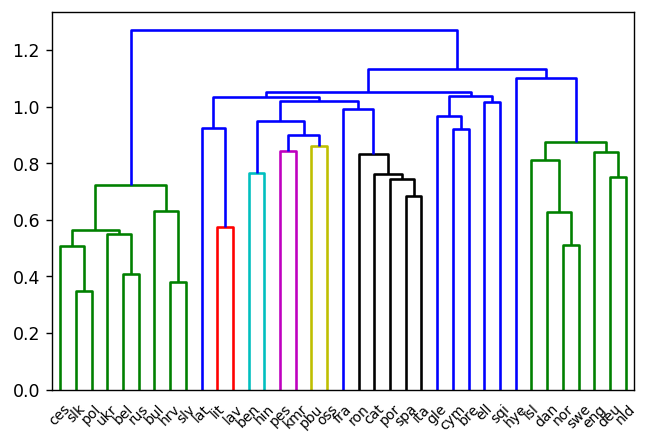

In [16]:
# Problem 4: use the linkage function with the average linkage method to compute the clustering.
def hierarchical_clustering(method='average'):
    linked = linkage(confusion, method=method)

    # plot the results using dendrogram
    def llf(id): 
        return list(languages["Language_ID"].values)[id]

    # plt.figure(figsize=(10, 7))
    plt.figure(dpi=125)

    dendrogram(linked,
            p=100,
            truncate_mode="level",
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=False,
            leaf_label_func=llf)

    plt.show()

# UPGMA
hierarchical_clustering(method='average')

***Question 6:*** Do you recognize any of the clusters of languages at any of the levels? Are there any noteworthy errors in this clustering?

**Q6: Similar to Quesiton 5, the clusters of languages align quite well with the subfamilies of Indo-European languages. The most noteworthy error in this clustering is that Lithuanian and Latvian are not grouped with the rest of the Balto-Slavic subfamily and are rather grouped closer to Latin.  Additionally, the colours do not perfectly align with the different subfamilies: Germanic and Balto-Slavic languages are both green; Celtic, Armenic, Graeco-Phrygian, Albanian, and two Italic (French and Latin) languages are dark blue; and Iranian languages are both cyan and pink.  Compared to the flat cluster from lingpy, the dendrogram from scipy illustrates more information about the arrangement of clusters.**

***Question 7:*** Try three of the other linkage methods and describe how the change the results.

**Q7: The clusters of languages from the 'complete' and 'weighted' methods align quite well with the subfamilies of Indo-European languages.  The 'complete' method had the following errors: Lithuanian and Latvian were grouped with the other Italic languages; Indo-Aryan and Iranian languages were not separated; and Armenian, Modern Greek, and Standard Albanian were not separated.  The 'weighted' method had the following errors: Lithuanian and Latvian were grouped with Latin rather than with the rest of the Balto-Slavic languages; Standard Albanian, French, Armenian, Modern Greek, and Irish were not separated; and Indo-Aryan and Iranian languages were not separated.  However, the 'centroid' method was not very good at clustering languages by subfamily.  It was only able to group together 9 out of the 11 Balto-Slavic languages, Lithuanian and Latvian, and Catalan and Portuguese.  The rest of the languages were all put in the same cluster.***

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


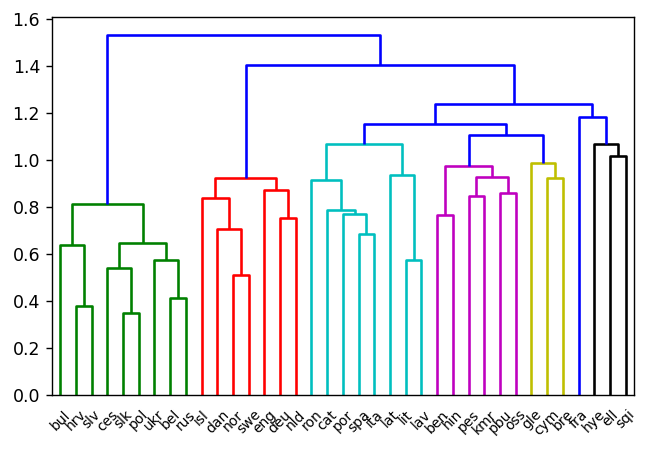

In [17]:
hierarchical_clustering(method='complete')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


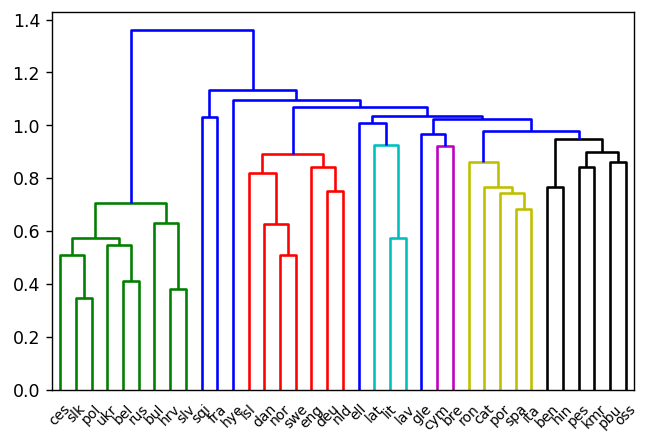

In [18]:
# WPGMA
hierarchical_clustering(method='weighted')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


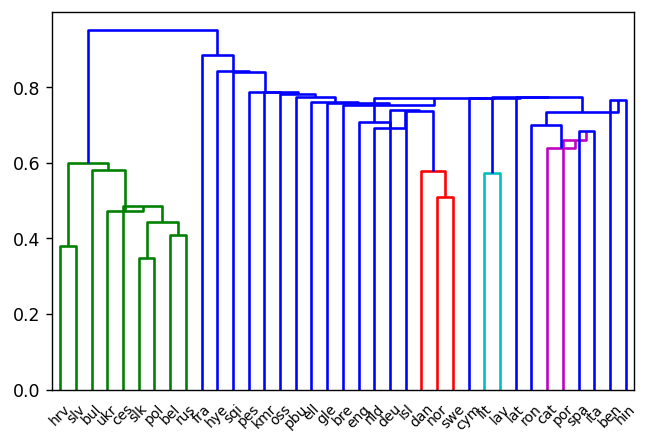

In [19]:
# UPGMC
hierarchical_clustering(method='centroid')

***Question 8:*** Try increasing the number of concepts we use to compute our confusion matrix to be higher than 20. Does it change the results?

**Q8: Increasing the number of concepts to be higher than 20 does not change the results: both the flat cluster dictionary and the dendrogram plot remain the same.  This makes sense because we were already using a relatively high number of concepts to compute our confusion matrix.  If we had started with a lower number of concepts (i.e. max_rank=5), increasing the number of concepts might have changed the results.**


In [20]:
def change_concepts(wordforms_lc_og, concepts_og, max_rank=20):
    max_rank = max_rank
    wordforms_lc = wordforms_lc_og.loc[wordforms_lc_og['position_in_ranking'] <= max_rank]
    concepts = concepts_og.loc[concepts_og['position_in_ranking'] <= max_rank]

    confusion = get_confusion_matrix(concepts)

    language_names = list(languages["Language_ID"].values)
    display(lp.algorithm.clustering.flat_cluster('upgma', 0.6, confusion, language_names))
    print()

    hierarchical_clustering(method='average')

concepts.shape: (30, 13)


{0: ['ben', 'hin'],
 2: ['pbu', 'oss'],
 3: ['pes', 'kmr'],
 6: ['hye'],
 7: ['ell'],
 8: ['sqi'],
 18: ['lit',
  'lav',
  'bul',
  'hrv',
  'slv',
  'slk',
  'pol',
  'ces',
  'bel',
  'rus',
  'ukr'],
 20: ['isl', 'nor', 'swe', 'dan', 'deu', 'nld', 'eng'],
 27: ['gle'],
 28: ['cym'],
 29: ['bre'],
 30: ['lat'],
 31: ['fra'],
 32: ['cat', 'spa', 'ita', 'por', 'ron']}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


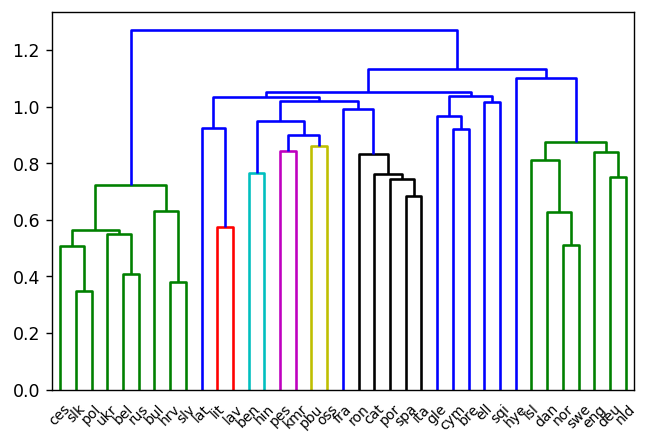

In [21]:
change_concepts(wordforms_lc_og, concepts_og, max_rank=30)

concepts.shape: (50, 13)


{0: ['ben', 'hin'],
 2: ['pbu', 'oss'],
 3: ['pes', 'kmr'],
 6: ['hye'],
 7: ['ell'],
 8: ['sqi'],
 18: ['lit',
  'lav',
  'bul',
  'hrv',
  'slv',
  'slk',
  'pol',
  'ces',
  'bel',
  'rus',
  'ukr'],
 20: ['isl', 'nor', 'swe', 'dan', 'deu', 'nld', 'eng'],
 27: ['gle'],
 28: ['cym'],
 29: ['bre'],
 30: ['lat'],
 31: ['fra'],
 32: ['cat', 'spa', 'ita', 'por', 'ron']}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


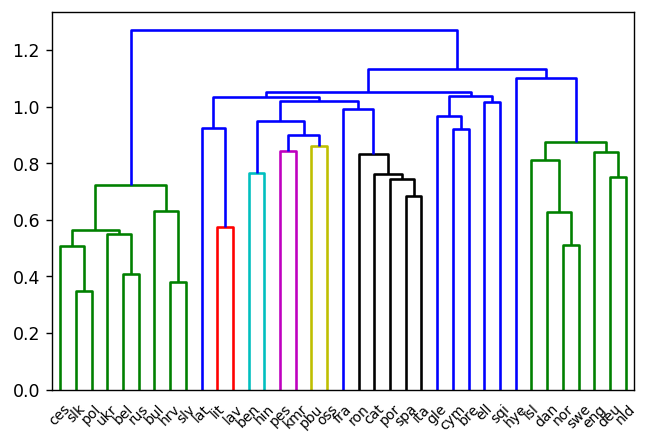

In [22]:
change_concepts(wordforms_lc_og, concepts_og, max_rank=50)

concepts.shape: (100, 13)


{0: ['ben', 'hin'],
 2: ['pbu', 'oss'],
 3: ['pes', 'kmr'],
 6: ['hye'],
 7: ['ell'],
 8: ['sqi'],
 18: ['lit',
  'lav',
  'bul',
  'hrv',
  'slv',
  'slk',
  'pol',
  'ces',
  'bel',
  'rus',
  'ukr'],
 20: ['isl', 'nor', 'swe', 'dan', 'deu', 'nld', 'eng'],
 27: ['gle'],
 28: ['cym'],
 29: ['bre'],
 30: ['lat'],
 31: ['fra'],
 32: ['cat', 'spa', 'ita', 'por', 'ron']}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


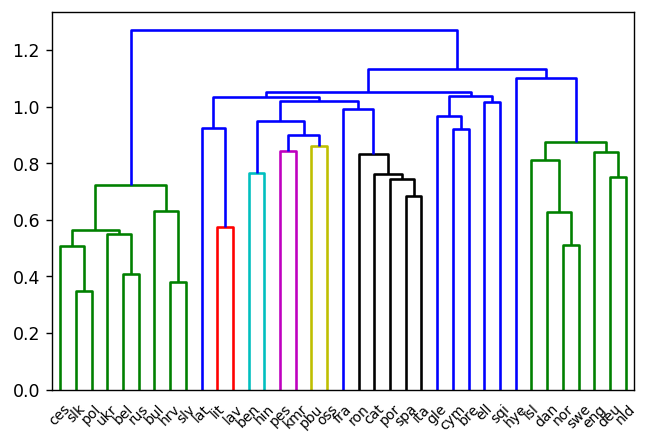

In [23]:
change_concepts(wordforms_lc_og, concepts_og, max_rank=100)